<a href="https://colab.research.google.com/github/tomonari-masada/course2023-intro2ml/blob/main/12_SVM_full_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 問題：SVMを使ってMNISTの10値分類を行う

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [10]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target
print(X.shape)
print(y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)
(70000,)


* 通常、MNISTデータは最後の10000件をテストデータとして使う。

* 以下のセルにある、データの分割の仕方を、変更しないこと。

In [11]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

* テストデータ以外の60000件を、訓練データ50000件と検証データ10000件へ分割しておく。
 * この分割は、変えないでください。

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train,
    test_size=10000,
    random_state=42,
    )

In [13]:
print(X_train.shape, X_valid.shape, X_test.shape)

(50000, 784) (10000, 784) (10000, 784)


* MNISTデータの最初の100個を可視化してみる。

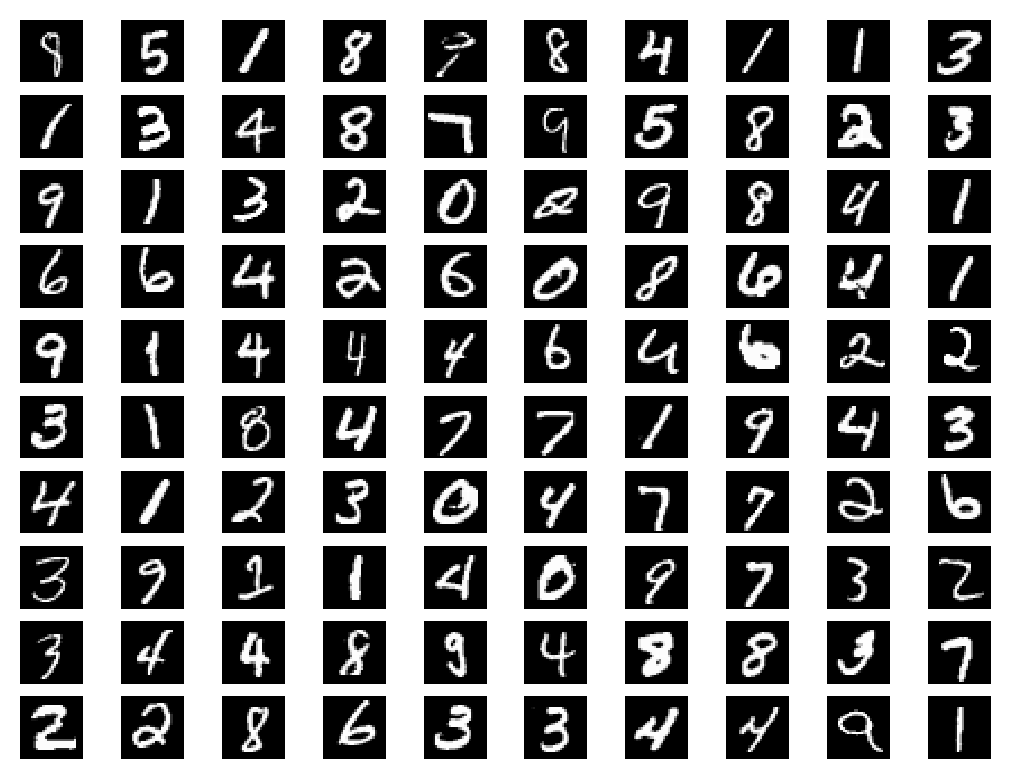

In [14]:
fig, axes = plt.subplots(10, 10)
for x, ax in zip(X_train.values[:100], axes.ravel()):
  ax.axis('off') # 軸を消す
  ax.matshow(x.reshape(28, 28), cmap=plt.cm.gray)

* 今回は、「０」〜「９」の10値分類問題のまま解く。

In [17]:
y_train.values

['8', '5', '1', '8', '9', ..., '3', '8', '0', '0', '4']
Length: 50000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

## 前処理：標準化
* 各ピクセルでの平均が0、標準偏差が1になるように、データを標準化しておく。
* こうすると分類精度が良くなったりする。

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) # 訓練データで平均と標準偏差を計算
X_train = scaler.transform(X_train) # 訓練データで求めた平均と標準偏差を使って標準化する
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## SVMによる分類の実行
* `LinearSVC`クラスを使う。
* 分類器を準備し、訓練データを渡して係数と切片を推定させる。
 * 訓練データの個数が多いので、少し時間がかかる。
 * 推定計算が収束しない場合は、`max_iter`を増やしてみる。

## SVMでの正則化
* scikit-learnの`LinearSVC`では、`C`というパラメータを調整する。
* `C`は、小さいほど、正則化が強く効く＝係数をより強くゼロに近づける。
 * デフォルトの設定は`C=1.0`。
 * リッジ回帰やLassoの`alpha`とは、向きが逆であることに、注意。

## 訓練データの個数を減らす

* `LinearSVC`の学習に時間がかかりすぎるので、訓練データの個数を減らす。

In [18]:
len(X_train)

50000

* 訓練データは50000個ある。
* と言うことは添字(index)は、0〜49999。
* indexが5で割り切れる訓練データだけ使う。
 * つまり、訓練データのデータ数を10000個に減らす。

In [ ]:
X_train[49999]

In [19]:
index_filter = (np.arange(len(X_train)) % 5 == 0)

In [20]:
index_filter

array([ True, False, False, ..., False, False, False])

In [21]:
len(X_train[index_filter])

10000

In [ ]:
y_train

## `LinearSVC`の学習

* `ConvergenceWarning`が出る場合は、`max_iter`を増やすと良いかもしれない。

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC() # デフォルトの設定
clf.fit(X_train[index_filter], y_train[index_filter]) # 訓練データは1/5に減らした

In [ ]:
print(f'Accuracy: {clf.score(X_valid, y_valid):.4f}')

* 試行錯誤する。
 * Cの値としては、ゼロより大きければOK。0.01のような値も試す。

In [ ]:
clf = LinearSVC(C=0.01)
clf.fit(X_train[index_filter], y_train[index_filter])
print(f'Accuracy: {clf.score(X_valid, y_valid):.4f}')

In [ ]:
clf = LinearSVC(C=100.0)
clf.fit(X_train[index_filter], y_train[index_filter])
print(f'Accuracy: {clf.score(X_valid, y_valid):.4f}')

In [ ]:
clf = LinearSVC(C=0.009)
clf.fit(X_train[index_filter], y_train[index_filter])
print(f'Accuracy: {clf.score(X_valid, y_valid):.4f}')

# 救済課題（10点満点）

## (1) 検証データでの正解率が↑この0.8951より大きい設定を見つける

* もし、訓練データを全て使って`LinearSVC`に学習させると・・・
 * 10分~12分待ちましょう。

In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)
print(f'Accuracy: {clf.score(X_valid, y_valid):.4f}')

## (2) 見つけ出した設定を使って最後にテストデータ上で評価


In [ ]:
clf = LinearSVC() # ()の中にベストだったCの値の設定を書く。
clf.fit(X_train[index_filter], y_train[index_filter])
#clf.fit(X_train, y_train) # 訓練データを全て使う場合はこの行をコメントでなくする
print(f'test accuracy: {clf.score(X_test, y_test):.4f}')